In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
#reading data
data = pd.read_csv("heart.csv")
df = pd.read_csv("o2Saturation.csv")
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
df.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [49]:
#pip install pandas-profiling

In [30]:
import dtale
d = dtale.show(data)

In [31]:
d

In [50]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory data analysis(EDA)

In [51]:
data["output"].unique()

array([1, 0], dtype=int64)

1    165
0    138
Name: output, dtype: int64


<AxesSubplot:xlabel='output', ylabel='count'>

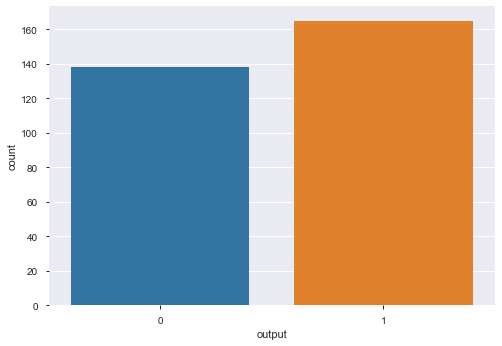

In [52]:
tar = data["output"]
target_dist = data.output.value_counts()
print(target_dist)
sns.countplot(tar)

In [53]:
#here we calculate the percentage of people who have had an attack vs those without.
heart_attack = target_dist[1]*100 /303
no_attack = target_dist[0]*100/303

print("percentage of pations who have had an attack:",heart_attack)
print("percentage of pations who have  never had an attack", no_attack)

percentage of pations who have had an attack: 54.45544554455446
percentage of pations who have  never had an attack 45.54455445544554


# checking relationship amoung variables

In [54]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


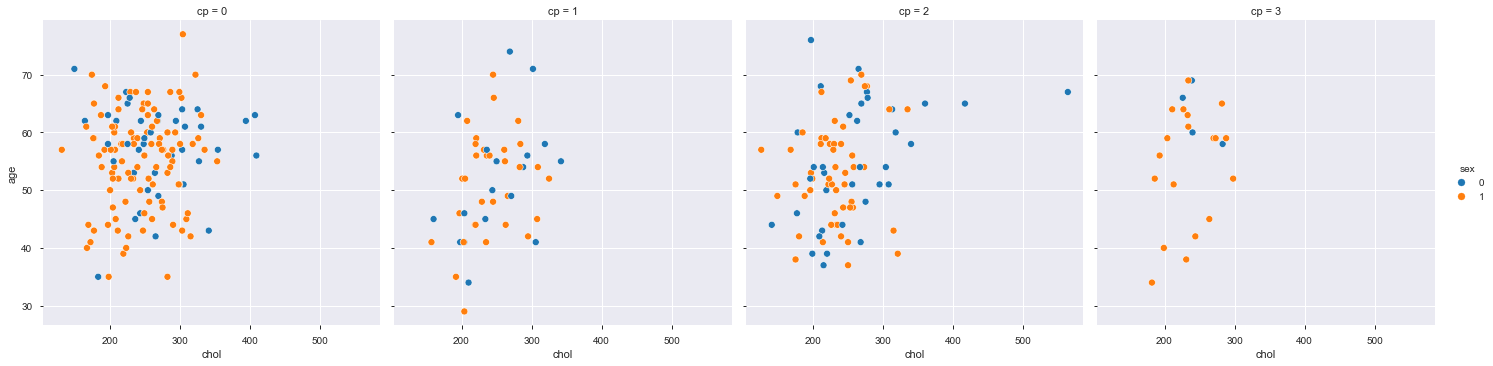

In [56]:
rela = sns.relplot(x = "chol", y = "age" , hue = "sex", data = data , col = "cp")

from the analysis above , i am checking the relationship between variables using seaborn relplot chart and from the result we can deduct that
people between the age of 50 years and 65 are experiencing cp = 0 (AGINA) which is the most common pain among the list. Also
we can conclude that these chest pains and cholestrol levels indicate that it is mostly among women that men (as shown on the charts)

# categorical plots

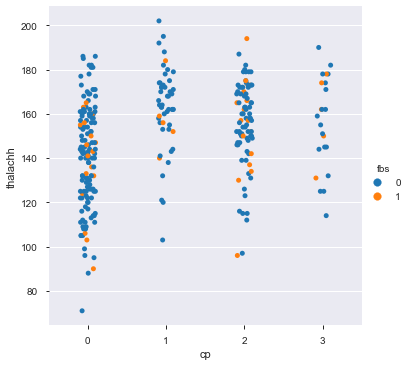

In [57]:
cat = sns.catplot(x ="cp",y = "thalachh" , hue = "fbs" , data = data)

fasting blood sugar (fbs) > 120  if  true denoted by 1 else 0 - (1 = True , 0 = false)

from the ctegorical plot above we can deduce that cp[0] is the common chest pain(cp) experirnced by the patients followed by
cp[2], cp[1]  and lastly cp[3]. we can also see that the the level of fasting blood sugar (fbs ) is below 120 meaning that 
most of the patients fbs is not above 120.

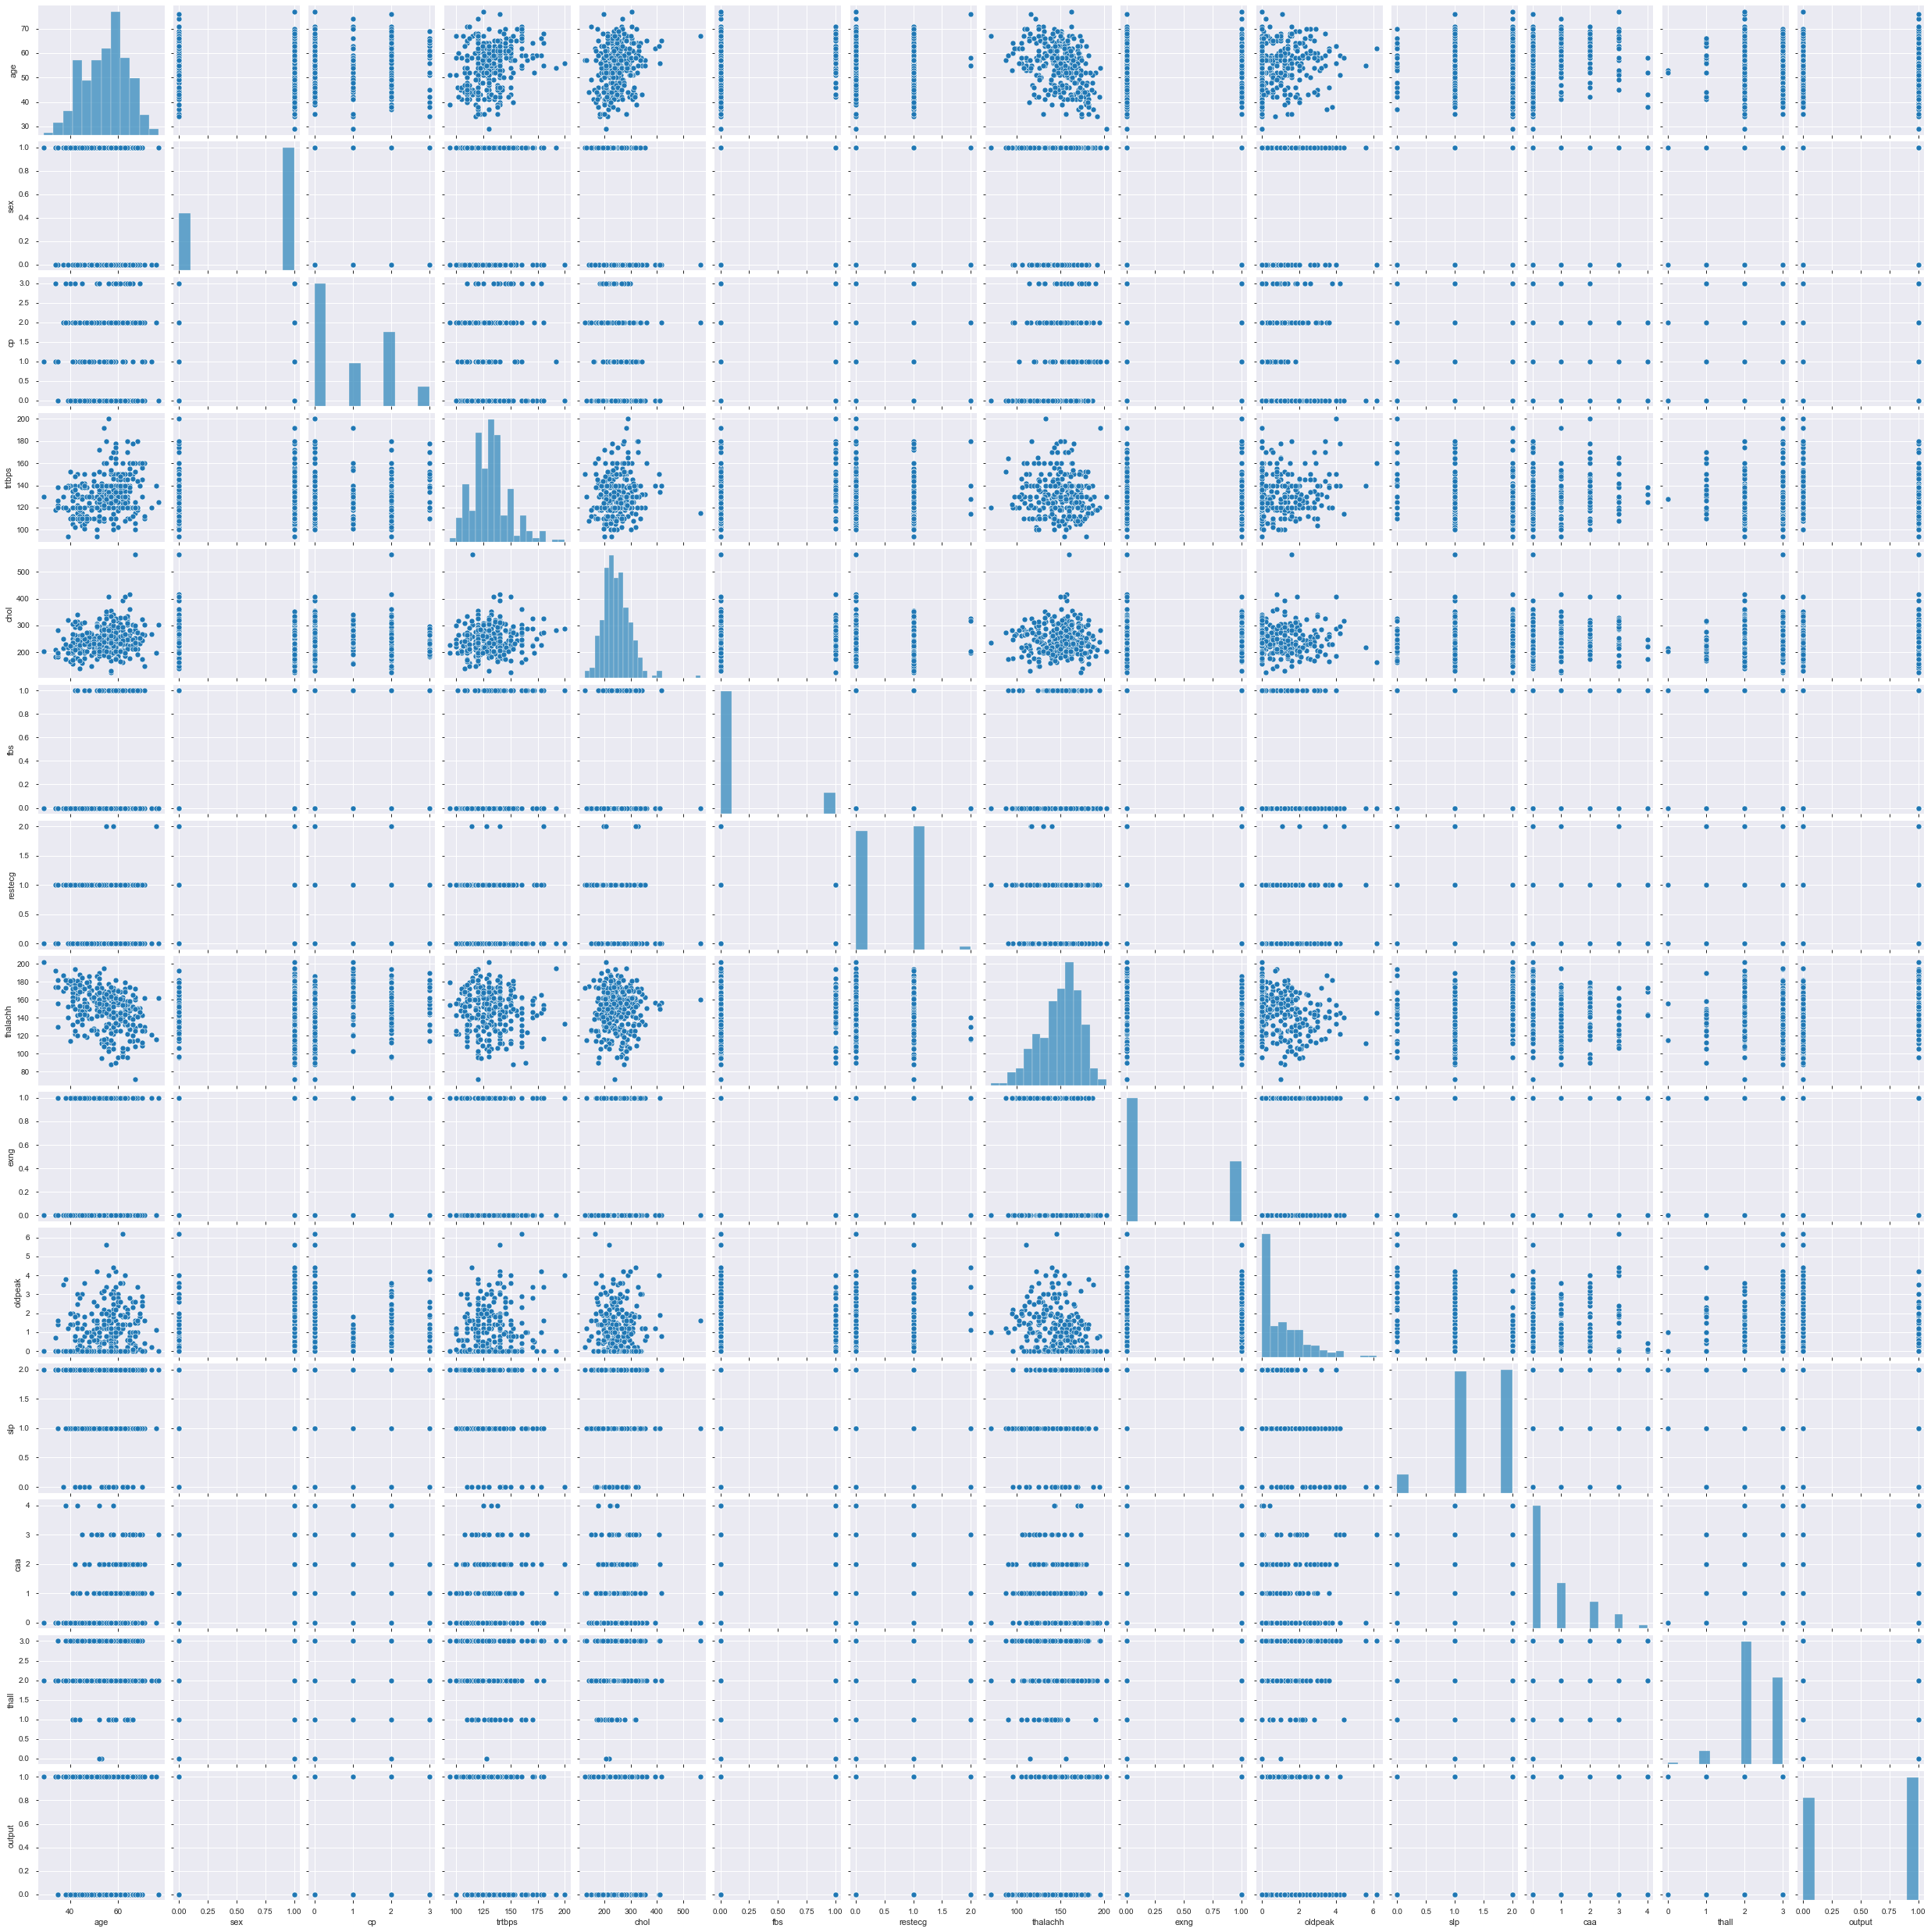

In [58]:
g =  sns.pairplot(data)

In [59]:
g

In [60]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [61]:
#checking for duplicate entries
data.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool>

In [62]:
data.shape

(303, 14)

In [63]:
#checking the data types in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
#checking for duplicate entries
dup_rows = data[data.duplicated()]
print("Number of duplicated entries are:", dup_rows.shape)

Number of duplicated entries are: (1, 14)


In [65]:
dup_rows.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [67]:
#droppping the dup row
data.drop([164])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
#checking for unique values and making them categorical variables
print("cp")
print(*list(data.cp.unique()))
print("restecg")
print(*list(data.restecg.unique()))



cp
3 2 1 0
restecg
0 1 2


In [69]:
# now we have to change the features from int to categorical feature using pandas categorical( function)
data.cp = pd.Categorical(data.cp)
data.restecg = pd.Categorical(data.restecg)

In [70]:
# again we check  data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    int64   
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    int64   
 11  caa       303 non-null    int64   
 12  thall     303 non-null    int64   
 13  output    303 non-null    int64   
dtypes: category(2), float64(1), int64(11)
memory usage: 29.4 KB


In [71]:
# lets get a discription of our data
data.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# outlier mining

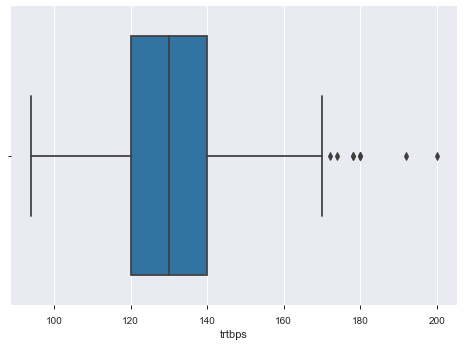

In [72]:
#lets viusalize our outliers
sns.boxplot(data["trtbps"])
xlable ="trtbps"

in the above analysis we can see that all values above 170 are acting as outliers

In [73]:
#position of the outliers
print(np.where(data['trtbps']>170))

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266], dtype=int64),)


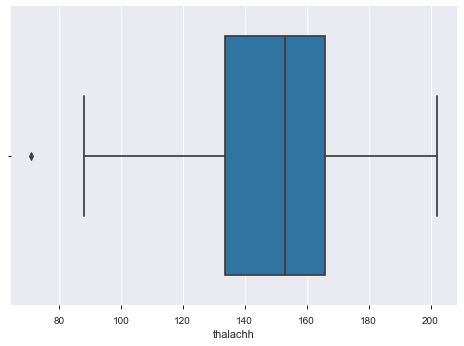

In [74]:
# outliers for thalach 
sns.boxplot(data["thalachh"])
xlable ="thalachh"

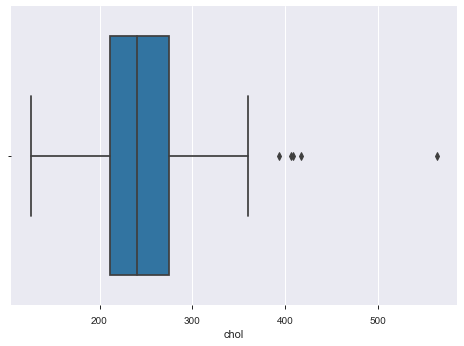

In [75]:
sns.boxplot(data["chol"])
xlable ="chol"

# detecting and removing outliers using the z-score 

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

In [76]:
from scipy import stats

z = np.abs(stats.zscore(data))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [77]:
threshold = 3
print(np.where(z > threshold))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[28][1] have a Z-score higher than 3.

In [78]:
print(z[28][1])

1.4684175155588415


In [79]:
clean_data = data[(z < 3).all(axis=1)]

In [80]:
#before outliers
data.shape

(303, 14)

In [81]:
clean_data.shape

(287, 14)

as we can see we have dropped 16 entries that were outliers

# checking correlation between our variables

In [82]:
 corr= clean_data.corr()
corr.style.background_gradient(cmap='PuOr')

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.072391,0.304702,0.177192,0.133044,-0.400067,0.112509,0.193431,-0.155421,0.368764,0.055830,-0.226750
sex,-0.072391,1.000000,-0.039006,-0.141218,0.058432,-0.053999,0.146867,0.166430,-0.054768,0.135552,0.244047,-0.302926
trtbps,0.304702,-0.039006,1.000000,0.143586,0.167890,-0.075059,0.065089,0.156988,-0.103302,0.057947,0.027382,-0.119281
chol,0.177192,-0.141218,0.143586,1.000000,-0.005337,-0.030874,0.085002,0.032452,0.011007,0.113238,0.049204,-0.099821
fbs,0.133044,0.058432,0.167890,-0.005337,1.000000,-0.007962,-0.009093,0.003692,-0.046927,0.151021,-0.014622,-0.011438
thalachh,-0.400067,-0.053999,-0.075059,-0.030874,-0.007962,1.000000,-0.392686,-0.353441,0.379395,-0.297154,-0.123956,0.431519
exng,0.112509,0.146867,0.065089,0.085002,-0.009093,-0.392686,1.000000,0.298277,-0.240616,0.153605,0.222884,-0.429082
oldpeak,0.193431,0.166430,0.156988,0.032452,0.003692,-0.353441,0.298277,1.000000,-0.546473,0.260600,0.175196,-0.424443
slp,-0.155421,-0.054768,-0.103302,0.011007,-0.046927,0.379395,-0.240616,-0.546473,1.000000,-0.085347,-0.068961,0.323948
caa,0.368764,0.135552,0.057947,0.113238,0.151021,-0.297154,0.153605,0.260600,-0.085347,1.000000,0.127607,-0.463258


As we can see the relationship between variables is quiet low but there is relationship between the variables

# separating independend colums from target columns

In [83]:
x = clean_data.iloc[:,0:12]
y = clean_data.iloc[:, -1]

In [84]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [85]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 287, dtype: int64

# scalling our data

In [86]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [93]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa
0,0.708333,1.0,1.000000,0.593023,0.399254,1.0,0.0,0.543860,0.0,0.522727,0.0,0.000000
1,0.166667,1.0,0.666667,0.418605,0.462687,0.0,0.5,0.868421,0.0,0.795455,0.0,0.000000
2,0.250000,0.0,0.333333,0.418605,0.291045,0.0,0.0,0.736842,0.0,0.318182,1.0,0.000000
3,0.562500,1.0,0.333333,0.302326,0.410448,0.0,0.5,0.789474,0.0,0.181818,1.0,0.000000
4,0.583333,0.0,0.000000,0.302326,0.850746,0.0,0.5,0.657895,1.0,0.136364,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.583333,0.0,0.000000,0.534884,0.429104,0.0,0.5,0.307018,1.0,0.045455,0.5,0.000000
283,0.333333,1.0,1.000000,0.186047,0.514925,0.0,0.5,0.385965,0.0,0.272727,0.5,0.000000
284,0.812500,1.0,0.000000,0.581395,0.250000,1.0,0.5,0.464912,0.0,0.772727,0.5,0.666667
285,0.583333,1.0,0.000000,0.418605,0.018657,0.0,0.5,0.236842,1.0,0.272727,0.5,0.333333


In [109]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Preprocessing data(part ii)

In [99]:
from sklearn.preprocessing import MinMaxScaler
#instantiate Minmax scaler and use it to rescale x_train and x_test
scaler = MinMaxScaler()
rescaled_xtrain = scaler.fit_transform(x_train)
rescaled_xtest = scaler.transform(x_test)

# 1 linear model (Logistic)

In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

result = model.fit(rescaled_xtrain,y_train)

In [101]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# use model to predict intances from the set and store it

y_pred = model.predict(rescaled_xtest)

# get the accuracy score and print it
print("Accuracy score of logistic regression classifier :",
     model.score(rescaled_xtest , y_test))


#print confusion matrix
confusion_matrix(y_test , y_pred)

Accuracy score of logistic regression classifier : 0.7241379310344828


array([[31, 15],
       [ 9, 32]], dtype=int64)

# 2 Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# create a model with 100 trees
model_fr = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
#fit on training data
model_fr.fit(x_train , y_train)

RandomForestClassifier(max_features='sqrt')

In [111]:
#make predictions
rf_preds = model_fr.predict(x_test)
# Probabilities for each class
rf_probs = model.predict_proba(x_test)[:, 1]

We make class predictions (predict) as well as predicted probabilities (predict_proba) to calculate the ROC AUC. Once we have the testing predictions, we can calculate the ROC AUC.

In [114]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print("ROC SCORE :", roc_value)

ROC SCORE : 0.8504772004241782


In [119]:

#print confusion matrix
confusion_matrix(y_test , rf_preds)

array([[36, 10],
       [ 7, 34]], dtype=int64)

# 3 XgBoost

In [117]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [122]:
# https://anaconda.org/anaconda/py-xgboost
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)
preds = model.predict(x_test)


[07:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
#evaluation


# saving model for production

In [89]:
import joblib

# save the model to disk
filename = 'finalized_Churn_Model.sav'
joblib.dump(model_xg, filename)

['finalized_Churn_Model.sav']

In [91]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.7931034482758621
